libraries

In [1]:
%run import_modules.py  
%matplotlib inline

# For DNN modeling
import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.random.set_seed(2020)
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot

Using TensorFlow backend.


load data

In [56]:
X_train, X_test, y_train, y_test, X_dep, ID_dep = pd.read_pickle('case3_train_test.pkl')

X_train.shape, X_test.shape


seed = 2020
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

i = int(round(X_train.shape[0] * 0.8, 0))
X_valid, y_valid = X_train[i:], y_train[i:]
X_train, y_train = X_train[:i], y_train[:i]

model architecture

In [70]:
# model architecture
model = Sequential(name = 'dnn model')
model.add(Dense(4, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# choose the optimizer and the cost function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "dnn model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 4)                 252       
_________________________________________________________________
dropout_29 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                160       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 5         
Total params: 549
Trainable params: 549
Non-trainable params: 0
___________________________________________________________

train the model

In [71]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)]

In [72]:
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                batch_size=64, epochs=200, callbacks=callbacks, verbose=2)

Train on 1960 samples, validate on 490 samples
Epoch 1/200
 - 0s - loss: 0.6911 - acc: 0.5740 - val_loss: 0.6848 - val_acc: 0.6245
Epoch 2/200
 - 0s - loss: 0.6818 - acc: 0.6184 - val_loss: 0.6767 - val_acc: 0.6245
Epoch 3/200
 - 0s - loss: 0.6743 - acc: 0.6189 - val_loss: 0.6693 - val_acc: 0.6245
Epoch 4/200
 - 0s - loss: 0.6694 - acc: 0.6173 - val_loss: 0.6613 - val_acc: 0.6245
Epoch 5/200
 - 0s - loss: 0.6641 - acc: 0.6179 - val_loss: 0.6544 - val_acc: 0.6245
Epoch 6/200
 - 0s - loss: 0.6548 - acc: 0.6179 - val_loss: 0.6458 - val_acc: 0.6245
Epoch 7/200
 - 0s - loss: 0.6457 - acc: 0.6179 - val_loss: 0.6349 - val_acc: 0.6245
Epoch 8/200
 - 0s - loss: 0.6345 - acc: 0.6179 - val_loss: 0.6232 - val_acc: 0.6245
Epoch 9/200
 - 0s - loss: 0.6240 - acc: 0.6184 - val_loss: 0.6095 - val_acc: 0.6245
Epoch 10/200
 - 0s - loss: 0.6109 - acc: 0.6219 - val_loss: 0.5903 - val_acc: 0.6245
Epoch 11/200
 - 0s - loss: 0.5902 - acc: 0.6612 - val_loss: 0.5738 - val_acc: 0.7061
Epoch 12/200
 - 0s - loss: 

visualize training history

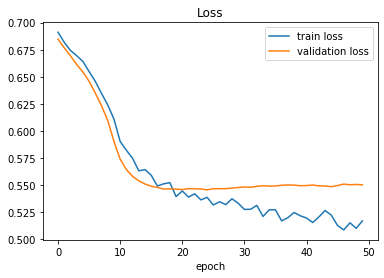

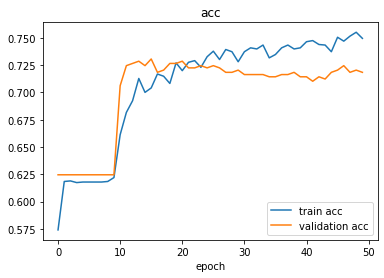

In [73]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.title('Loss')
plt.show()


plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='validation acc')
plt.legend()
plt.xlabel('epoch')
plt.title('acc')
plt.show()

evaluate the model performance

In [74]:
print(model.evaluate(X_test, y_test))
print(roc_auc_score(y_test, model.predict(X_test)))

1050/1050 [==============================] - 0s 19us/step
[0.5885888252371834, 0.6933333277702332]
0.7376566286047577


predict unseen data

In [44]:
pred = model.predict(X_dep).flatten()
print(pred.shape)


(2482,)


In [54]:
# make submissions

pd.DataFrame({'cust_id': ID_dep, 'gender': pred})

,cust_id,gender
0,3500,8.833725e-01
1,3501,6.258488e-07
2,3502,2.416034e-01
3,3503,1.608026e-01
4,3504,5.221696e-01
...,...,...
2477,5977,3.008423e-01
2478,5978,1.833051e-02
2479,5979,8.907700e-01
2480,5980,6.064883e-02


save the model for future use

In [55]:
# pickle 형식으로 저장
with open('nm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [56]:
# 추후 저장한 모형 불러올 때
model = pd.read_pickle('nm_model.pkl')

In [58]:
# h5 형식으로 저장
model.save('nm_model.h5')

In [59]:
# 추후 저장한 모형 불러올 때
model = load_model('nm_model.h5')

1. libraries, read data     
2. data engineering   
3. model architecture, choose the optimizer and the cost function, train the model   
4. visualize training history, evaluate the model performance   
5. predict unseen data, save the model for future use   